In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
df = df.astype({"age":'int64'})

In [5]:
df.card.replace({"yes":1,"no":0},inplace=True)
df.owner.replace({"yes":1,"no":0},inplace=True)
df.selfemp.replace({"yes":1,"no":0},inplace=True)


In [6]:
df.expenditure.replace(0,df.expenditure.median(),inplace=True) 

In [7]:
for i in df[df.age<18].index:
    df.age[i]=np.mean(df.age)

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32,9.7867,0.067051,546.503300,1,0,2,64,1,5


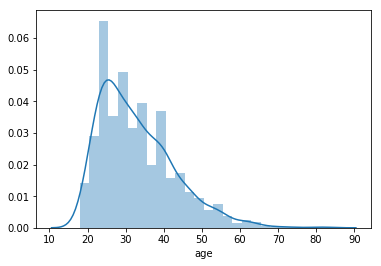

In [9]:
sns.distplot(df.age)

In [10]:
df.age.describe()

count    1319.000000
mean       32.933283
std         9.859488
min        18.000000
25%        25.000000
50%        31.000000
75%        39.000000
max        83.000000
Name: age, dtype: float64

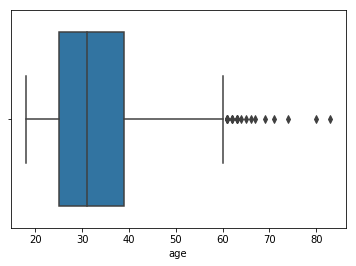

In [11]:
sns.boxplot(x="age",hue="card",data=df)

In [12]:
q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)
iqr=q3-q1
tm=q3+1.5*iqr


l=df[df.age>tm].index
for i in l:
    df.age[i]=tm

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
df.age.describe()

count    1319.000000
mean       32.840788
std         9.541880
min        18.000000
25%        25.000000
50%        31.000000
75%        39.000000
max        60.000000
Name: age, dtype: float64

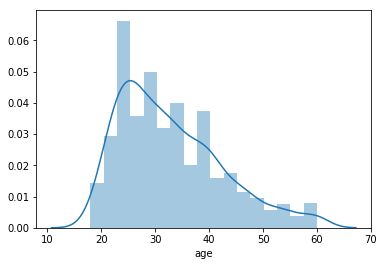

In [14]:
sns.distplot(df.age)

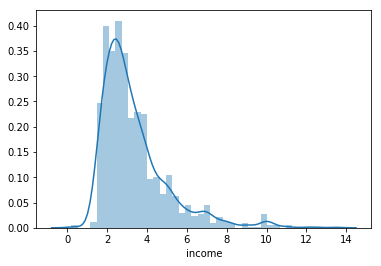

In [15]:
sns.distplot(df.income)

In [16]:
df.income.describe()

count    1319.000000
mean        3.365376
std         1.693902
min         0.210000
25%         2.243750
50%         2.900000
75%         4.000000
max        13.500000
Name: income, dtype: float64

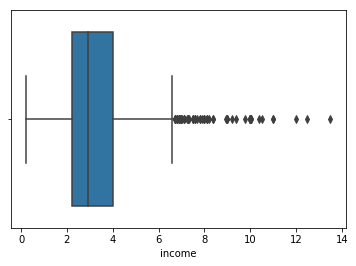

In [17]:
sns.boxplot(x="income",hue="card",data=df)

In [18]:
q1=df["income"].quantile(0.25)
q3=df["income"].quantile(0.75)
iqr=q3-q1
tm=q3+1.5*iqr


l=df[df.income>tm].index
for i in l:
    df.income[i]=tm

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df.income.describe()

count    1319.000000
mean        3.268958
std         1.388826
min         0.210000
25%         2.243750
50%         2.900000
75%         4.000000
max         6.634375
Name: income, dtype: float64

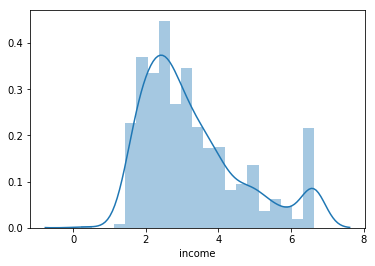

In [20]:
sns.distplot(df.income)

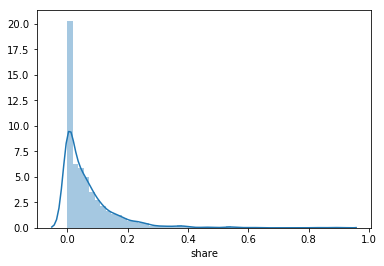

In [21]:
sns.distplot(df.share)

In [22]:
df.share.describe()

count    1319.000000
mean        0.068732
std         0.094656
min         0.000109
25%         0.002316
50%         0.038827
75%         0.093617
max         0.906320
Name: share, dtype: float64

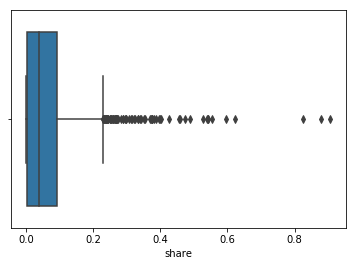

In [23]:
sns.boxplot(x="share",hue="card",data=df)

In [24]:
q1=df["share"].quantile(0.25)
q3=df["share"].quantile(0.75)
iqr=q3-q1
tm=q3+1.5*iqr


l=df[df.share>tm].index
for i in l:
    df.share[i]=tm

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
df.share.describe()

count    1319.000000
mean        0.061805
std         0.068127
min         0.000109
25%         0.002316
50%         0.038827
75%         0.093617
max         0.230568
Name: share, dtype: float64

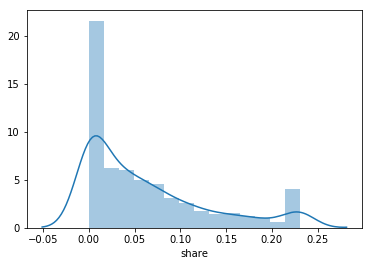

In [26]:
sns.distplot(df.share)

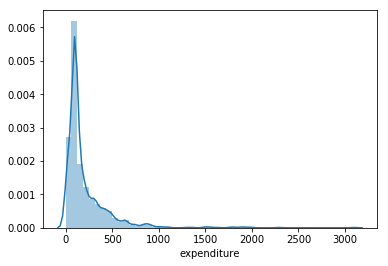

In [27]:
sns.distplot(df.expenditure)

In [28]:
df.expenditure.describe()

count    1319.000000
mean      209.402454
std       258.767466
min         0.312500
25%        97.726250
50%       101.298300
75%       249.035800
max      3099.505000
Name: expenditure, dtype: float64

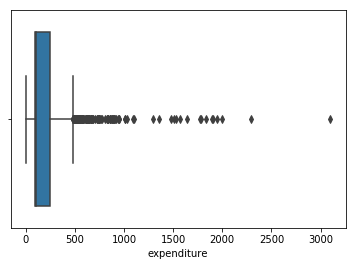

In [29]:
sns.boxplot(x="expenditure",hue="card",data=df)

In [30]:
q1=df["expenditure"].quantile(0.25)
q3=df["expenditure"].quantile(0.75)
iqr=q3-q1
tm=q3+1.5*iqr


l=df[df.expenditure>tm].index
for i in l:
    df.expenditure[i]=tm

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
df.expenditure.describe()

count    1319.000000
mean      177.536667
std       142.164059
min         0.312500
25%        97.726250
50%       101.298300
75%       249.035800
max       476.000125
Name: expenditure, dtype: float64

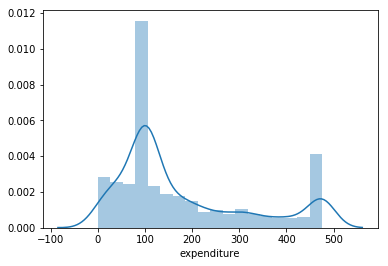

In [32]:
sns.distplot(df.expenditure)

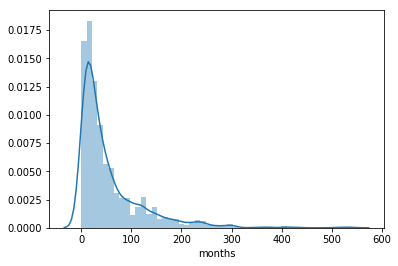

In [33]:
sns.distplot(df.months)

In [34]:
df.months.describe()

count    1319.000000
mean       55.267627
std        66.271746
min         0.000000
25%        12.000000
50%        30.000000
75%        72.000000
max       540.000000
Name: months, dtype: float64

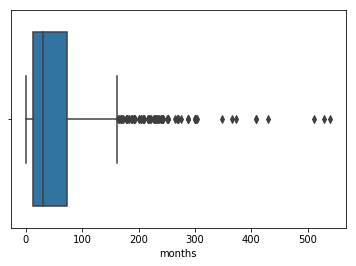

In [35]:
sns.boxplot(x="months",hue="card",data=df)

In [36]:
q1=df["months"].quantile(0.25)
q3=df["months"].quantile(0.75)
iqr=q3-q1
tm=q3+1.5*iqr


l=df[df.months>tm].index
for i in l:
    df.months[i]=tm

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
df.months.describe()

count    1319.000000
mean       49.813495
std        48.529219
min         0.000000
25%        12.000000
50%        30.000000
75%        72.000000
max       162.000000
Name: months, dtype: float64

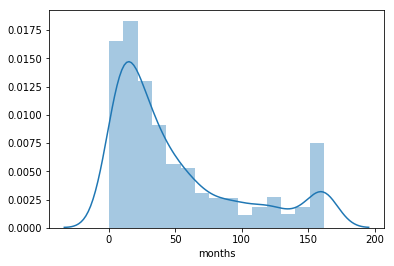

In [38]:
sns.distplot(df.months)

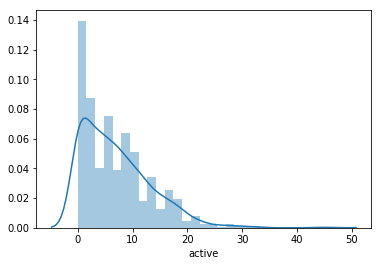

In [39]:
sns.distplot(df.active)

In [40]:
df.active.describe()

count    1319.000000
mean        6.996967
std         6.305812
min         0.000000
25%         2.000000
50%         6.000000
75%        11.000000
max        46.000000
Name: active, dtype: float64

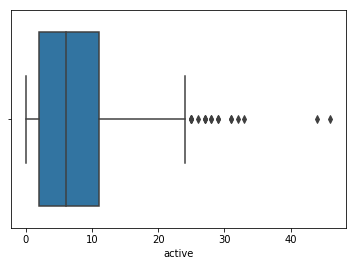

In [41]:
sns.boxplot(x="active",hue="card",data=df)

In [42]:
q1=df["active"].quantile(0.25)
q3=df["active"].quantile(0.75)
iqr=q3-q1
tm=q3+1.5*iqr


l=df[df.active>tm].index
for i in l:
    df.active[i]=tm

/home/israfil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [43]:
df.active.describe()

count    1319.000000
mean        6.916603
std         6.006498
min         0.000000
25%         2.000000
50%         6.000000
75%        11.000000
max        24.000000
Name: active, dtype: float64

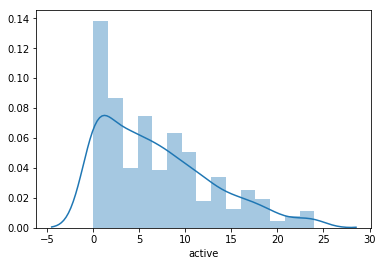

In [44]:
sns.distplot(df.active)

In [45]:
df.corr()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
card,1.000000,-0.452577,0.007025,0.109910,0.484413,0.288574,0.147826,-0.054340,-0.036126,0.021682,0.107769,0.096645
reports,-0.452577,1.000000,0.044972,0.013222,-0.198569,-0.095057,-0.053570,0.018835,0.019731,0.057682,-0.007304,0.203120
age,0.007025,0.044972,1.000000,0.357171,-0.115875,-0.004894,0.379858,0.096750,0.229655,0.440921,0.008151,0.189088
income,0.109910,0.013222,0.357171,1.000000,-0.044841,0.253139,0.343112,0.113498,0.335918,0.132592,0.120595,0.192677
share,0.484413,-0.198569,-0.115875,-0.044841,1.000000,0.867812,0.003731,-0.083158,-0.081575,-0.038420,0.052574,0.005574
expenditure,0.288574,-0.095057,-0.004894,0.253139,0.867812,1.000000,0.081656,-0.041412,0.045384,-0.006218,0.065933,0.036073
owner,0.147826,-0.053570,0.379858,0.343112,0.003731,0.081656,1.000000,0.041673,0.309190,0.253526,0.063851,0.282950
selfemp,-0.054340,0.018835,0.096750,0.113498,-0.083158,-0.041412,0.041673,1.000000,0.042096,0.084788,0.004854,0.020222
dependents,-0.036126,0.019731,0.229655,0.335918,-0.081575,0.045384,0.309190,0.042096,1.000000,0.085813,0.010285,0.114229
months,0.021682,0.057682,0.440921,0.132592,-0.038420,-0.006218,0.253526,0.084788,0.085813,1.000000,-0.045658,0.135980


In [46]:
y=df.card
X=df.drop(["card"],axis=1)

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
reports        1319 non-null int64
age            1319 non-null int64
income         1319 non-null float64
share          1319 non-null float64
expenditure    1319 non-null float64
owner          1319 non-null int64
selfemp        1319 non-null int64
dependents     1319 non-null int64
months         1319 non-null int64
majorcards     1319 non-null int64
active         1319 non-null int64
dtypes: float64(3), int64(8)
memory usage: 113.4 KB


# Select most important columns

In [48]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:] 
y = df.iloc[:,0] 

bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(7,'Score'))

          Specs         Score
4   expenditure  12494.531621
0       reports   1070.448271
10       active     64.212889
8        months     29.294041
3         share     23.225259
5         owner     16.127115
2        income      9.394506


In [49]:
df1=df.drop(["age","dependents","majorcards","selfemp"],axis=1)
df1.corr()

,card,reports,income,share,expenditure,owner,months,active
card,1.000000,-0.452577,0.109910,0.484413,0.288574,0.147826,0.021682,0.096645
reports,-0.452577,1.000000,0.013222,-0.198569,-0.095057,-0.053570,0.057682,0.203120
income,0.109910,0.013222,1.000000,-0.044841,0.253139,0.343112,0.132592,0.192677
share,0.484413,-0.198569,-0.044841,1.000000,0.867812,0.003731,-0.038420,0.005574
expenditure,0.288574,-0.095057,0.253139,0.867812,1.000000,0.081656,-0.006218,0.036073
owner,0.147826,-0.053570,0.343112,0.003731,0.081656,1.000000,0.253526,0.282950
months,0.021682,0.057682,0.132592,-0.038420,-0.006218,0.253526,1.000000,0.135980
active,0.096645,0.203120,0.192677,0.005574,0.036073,0.282950,0.135980,1.000000


In [50]:
X=df.drop(["card","age","dependents","majorcards","selfemp","expenditure"],axis=1)
y=df.card

In [51]:
X.head()

,reports,income,share,owner,months,active
0,0,4.520000,0.033270,1,54,12
1,0,2.420000,0.005217,0,34,13
2,0,4.500000,0.004156,1,58,5
3,0,2.540000,0.065214,0,25,7
4,0,6.634375,0.067051,1,64,5


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

/home/israfil/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/israfil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/israfil/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/israfil/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [53]:
X.shape

(1319, 6)

# Fit the model into Logisticregression

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/home/israfil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Results for LogisticRegression

In [55]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[ 45,   5],
       [ 16, 198]])

In [56]:
metrics.accuracy_score(y_test,y_pred)

0.9204545454545454

In [57]:
metrics.precision_score(y_test,y_pred)

0.9753694581280788

In [58]:
metrics.recall_score(y_test,y_pred)

0.9252336448598131

In [59]:
metrics.roc_auc_score(y_test,y_pred)

0.9126168224299066

In [60]:
metrics.f1_score(y_test,y_pred)

0.9496402877697843

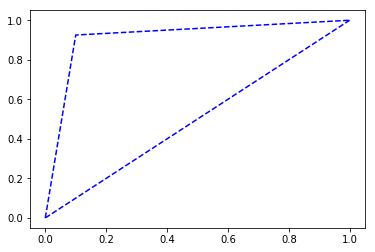

In [61]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,"b--")
plt.plot([0,1],[0,1],"b--")

# For Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix


In [63]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 50,   0],
       [ 15, 199]])

In [64]:
metrics.accuracy_score(y_test,y_pred)

0.9431818181818182

In [65]:
metrics.precision_score(y_test,y_pred)

1.0

In [66]:
metrics.recall_score(y_test,y_pred)

0.9299065420560748

In [67]:
metrics.roc_auc_score(y_test,y_pred)

0.9649532710280374

In [68]:
metrics.f1_score(y_test,y_pred)

0.963680387409201

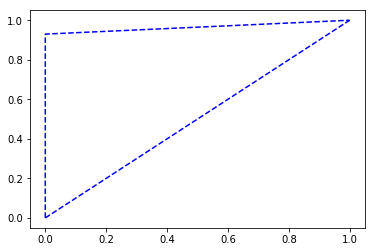

In [69]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,"b--")
plt.plot([0,1],[0,1],"b--")

# For KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knnobj=KNeighborsClassifier(n_neighbors=5)
knnobj.fit(X_train,y_train)
testp=knnobj.predict(X_test)


In [72]:
metrics.confusion_matrix(y_test,testp)

array([[ 33,  17],
       [ 14, 200]])

In [73]:
metrics.accuracy_score(y_test,testp)

0.8825757575757576

In [74]:
metrics.recall_score(y_test,testp)

0.9345794392523364

In [75]:
metrics.precision_score(y_test,testp)

0.9216589861751152

In [76]:
metrics.roc_auc_score(y_test,testp)

0.7972897196261682

In [77]:
metrics.f1_score(y_test,y_pred)

0.963680387409201

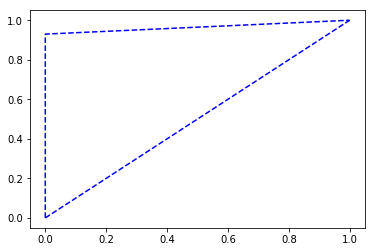

In [78]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,"b--")
plt.plot([0,1],[0,1],"b--")

# For Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gnobj=GaussianNB()
gnobj.fit(X_train,y_train)
testp=gnobj.predict(X_test)

In [81]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 50,   0],
       [ 15, 199]])

In [82]:
metrics.precision_score(y_test,y_pred)

1.0

In [83]:
metrics.recall_score(y_test,y_pred)

0.9299065420560748

In [84]:
metrics.accuracy_score(y_test,y_pred)

0.9431818181818182

In [85]:
metrics.roc_auc_score(y_test,y_pred)

0.9649532710280374

In [86]:
metrics.f1_score(y_test,y_pred)

0.963680387409201

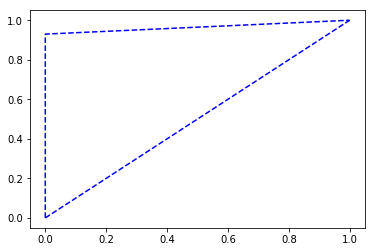

In [87]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)

plt.plot(fpr,tpr,"b--")
plt.plot([0,1],[0,1],"b--")